In [1]:
import numpy as np
import scipy.special as scpsp
import matplotlib.pyplot as plt

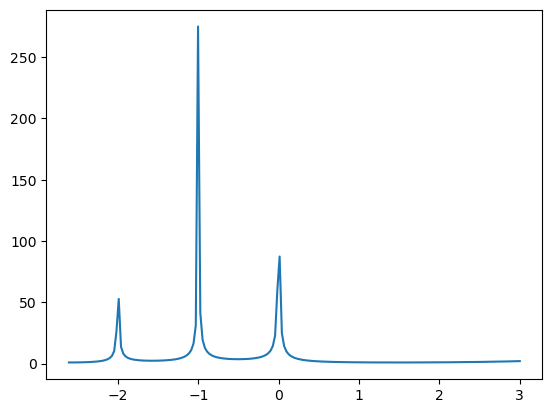

In [8]:
#real: [-4, 0], imag: [-5, 5]
#abs(scpsp.gamma(2j))
xs=np.linspace(-2.61072086844414,3,200)
num=np.abs(scpsp.gamma(xs*1))
plt.plot(xs,num)

In [10]:
xs=np.linspace(-2.61072086844414,3,800)#-4, 3
ys=np.linspace(-1.3,1.3,650)#-1, 1
zs=[]
for x in xs:
    zs.append(abs(scpsp.gamma(x+ys*1j)))

In [11]:
objout="o Gamma\n"
for x in range(len(xs)):
    for y in range(len(ys)):
        objout+="v "+str(xs[x])+" "+str(ys[y])+" "+str(zs[x][y])+"\n"

ll=len(ys)
for x in range(len(xs)-1):
    for y in range(len(ys)-1):
        #objout+="f "+str(x*ll+y+1)+" "+str(x*ll+y+2)+" "+str((x+1)*ll+y+1)+" "+str((x+1)*ll+y+2)+"\n"
        objout+="f "+str(x*ll+y+1)+" "+str(x*ll+y+2)+" "+str((x+1)*ll+y+2)+" "+str((x+1)*ll+y+1)+"\n"
"""objout+="v 1.0 -1.0 1.0\n"
objout+="v 1.0 -1.0 -1.0\n"
objout+="v -1.0 -1.0 -1.0\n"
objout+="v -1.0 -1.0 1.0\n"
#objout+="s 1\n"
objout+="f 1 2 3\n"
objout+="f 4 2 3\n" """
objf=open("gamma.obj","w")
objf.write(objout)
objf.close()

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

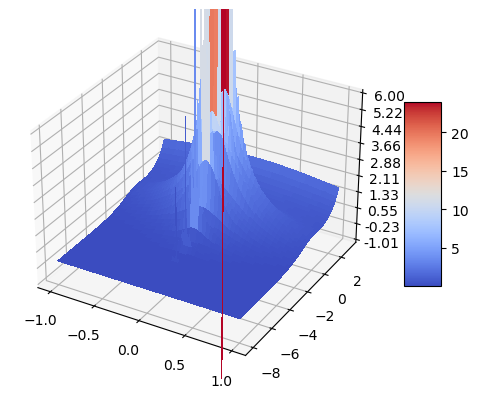

In [69]:
pf0,pa0=plt.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(xs, ys)
Z = np.abs(scpsp.gamma(X+Y*1j))

surf = pa0.plot_surface(Y, X, Z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
pa0.set_zlim(-1.01, 6)
pa0.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
pa0.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
pf0.colorbar(surf, shrink=0.5, aspect=5)

plt.show()